# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

# Import Dataset

In [2]:
airline = pd.read_csv("C:\Local Disk (A);\Excelr\Assignment Excelr\\7 Clustering\EastWestAirlines.csv")
# Covert Excel file into CSV file then Import 

In [3]:
airline.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [4]:
airline.columns = ('ID', 'Balance', 'Qualmiles', 'cc1', 'cc2', 'cc3',
       'Bonusmiles', 'Bonustrans', 'Flightmiles', 'Flighttrans',
       'Dayssinceenroll', 'Award')

In [5]:
airline.head()

,ID,Balance,Qualmiles,cc1,cc2,cc3,Bonusmiles,Bonustrans,Flightmiles,Flighttrans,Dayssinceenroll,Award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [6]:
airline1 = airline.drop('ID',axis=1)

In [7]:
# Check Categorical Data
airline1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Balance          3999 non-null   int64
 1   Qualmiles        3999 non-null   int64
 2   cc1              3999 non-null   int64
 3   cc2              3999 non-null   int64
 4   cc3              3999 non-null   int64
 5   Bonusmiles       3999 non-null   int64
 6   Bonustrans       3999 non-null   int64
 7   Flightmiles      3999 non-null   int64
 8   Flighttrans      3999 non-null   int64
 9   Dayssinceenroll  3999 non-null   int64
 10  Award            3999 non-null   int64
dtypes: int64(11)
memory usage: 343.8 KB


In [8]:
airline1.describe()

,Balance,Qualmiles,cc1,cc2,cc3,Bonusmiles,Bonustrans,Flightmiles,Flighttrans,Dayssinceenroll,Award
count,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [9]:
# Check Null Values
airline1.isna().sum()

Balance            0
Qualmiles          0
cc1                0
cc2                0
cc3                0
Bonusmiles         0
Bonustrans         0
Flightmiles        0
Flighttrans        0
Dayssinceenroll    0
Award              0
dtype: int64

In [10]:
airline1.corr()

,Balance,Qualmiles,cc1,cc2,cc3,Bonusmiles,Bonustrans,Flightmiles,Flighttrans,Dayssinceenroll,Award
Balance,1.000000,0.108722,0.338344,-0.008804,0.035243,0.403487,0.324935,0.217551,0.255700,0.263129,0.178494
Qualmiles,0.108722,1.000000,0.007931,-0.013923,-0.007779,0.031021,0.050725,0.126774,0.144004,0.017312,0.095256
cc1,0.338344,0.007931,1.000000,-0.068223,0.060555,0.825200,0.608943,0.037370,0.041333,0.230849,0.335457
cc2,-0.008804,-0.013923,-0.068223,1.000000,-0.006166,-0.003969,0.064399,0.010598,0.028284,-0.005807,0.005332
cc3,0.035243,-0.007779,0.060555,-0.006166,1.000000,0.204134,0.097313,-0.001777,-0.001117,0.010832,0.023484
Bonusmiles,0.403487,0.031021,0.825200,-0.003969,0.204134,1.000000,0.603180,0.183536,0.185261,0.210397,0.373506
Bonustrans,0.324935,0.050725,0.608943,0.064399,0.097313,0.603180,1.000000,0.377216,0.432364,0.161262,0.333893
Flightmiles,0.217551,0.126774,0.037370,0.010598,-0.001777,0.183536,0.377216,1.000000,0.869193,0.037271,0.217715
Flighttrans,0.255700,0.144004,0.041333,0.028284,-0.001117,0.185261,0.432364,0.869193,1.000000,0.059260,0.247909
Dayssinceenroll,0.263129,0.017312,0.230849,-0.005807,0.010832,0.210397,0.161262,0.037271,0.059260,1.000000,0.188121


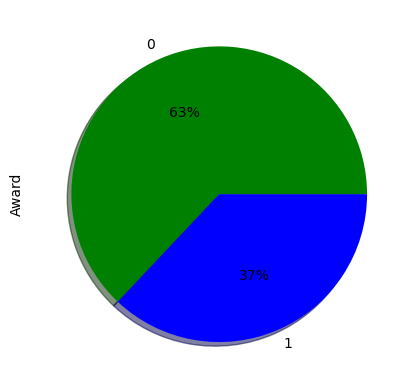

In [11]:
airline['Award'].value_counts().plot(kind='pie',autopct='%2.0f%%',colors=['green','blue'],shadow=True)
plt.show()

# Feature Scaliing

In [12]:
# Standard Scaler Feature Scaling
sc = StandardScaler()
airline_scal = sc.fit_transform(airline1)
airline_scal

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

# Hierachical Model Building

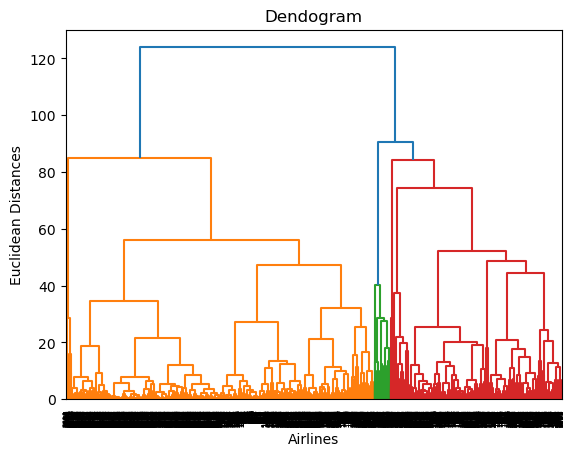

In [13]:
dendogram = sch.dendrogram(sch.linkage(airline_scal, method='ward'))
plt.title('Dendogram')
plt.xlabel('Airlines')
plt.ylabel('Euclidean Distances')
plt.show()

In [14]:
hc = AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')
y_hc = hc.fit_predict(airline_scal)
y_hc

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

In [15]:
y = pd.DataFrame(y_hc)
y.value_counts()

1    2446
0    1362
2     130
3      43
4      18
dtype: int64

In [16]:
airline['Cluster_hier']=hc.labels_
airline

,ID,Balance,Qualmiles,cc1,cc2,cc3,Bonusmiles,Bonustrans,Flightmiles,Flighttrans,Dayssinceenroll,Award,Cluster_hier
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,1


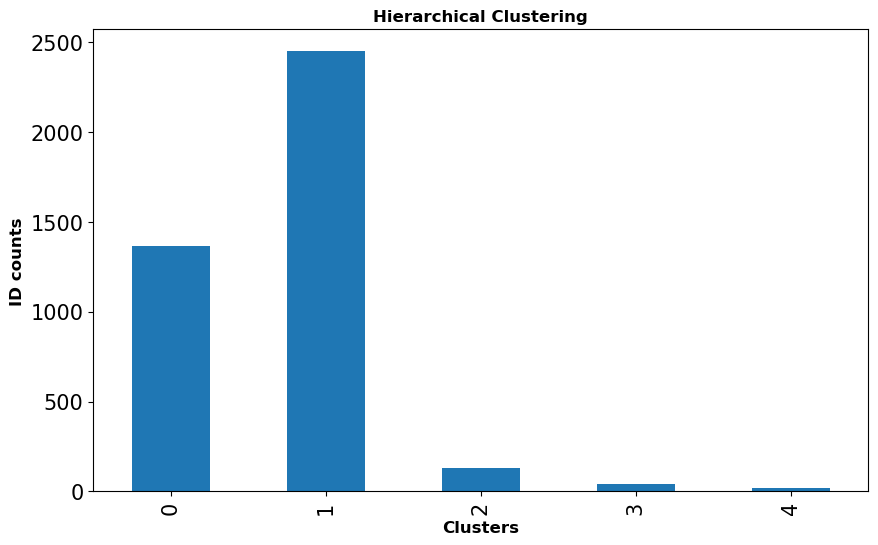

In [17]:
fig, ax = plt.subplots(figsize=(10, 6))
airline.groupby(['Cluster_hier']).count()['ID'].plot(kind='bar')
plt.title('Hierarchical Clustering',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('ID counts', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

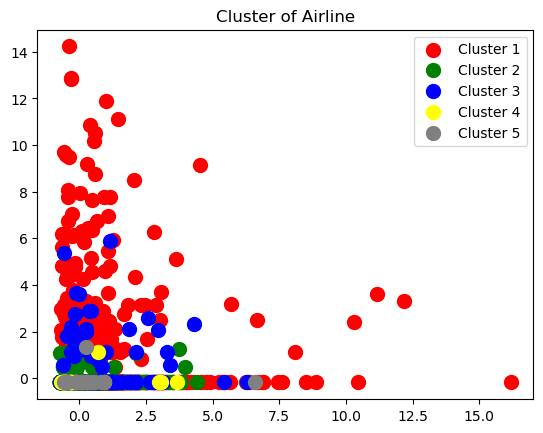

In [18]:
plt.scatter(airline_scal[y_hc == 0,0], airline_scal[y_hc == 0,1], s=100, c='red', label= 'Cluster 1')
plt.scatter(airline_scal[y_hc == 1,0], airline_scal[y_hc == 1,1], s=100, c='green', label= 'Cluster 2')
plt.scatter(airline_scal[y_hc == 2,0], airline_scal[y_hc == 2,1], s=100, c='blue', label= 'Cluster 3')
plt.scatter(airline_scal[y_hc == 3,0], airline_scal[y_hc == 3,1], s=100, c='yellow', label= 'Cluster 4')
plt.scatter(airline_scal[y_hc == 4,0], airline_scal[y_hc == 4,1], s=100, c='Grey', label= 'Cluster 5')
plt.title('Cluster of Airline')
plt.legend()
plt.show()

In [19]:
sil = silhouette_score(airline_scal , hc.labels_)
sil

0.3098805307874414

# DBSCAN

In [20]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=10)
nbrs = neigh.fit(airline_scal)
distances , indices = nbrs.kneighbors(airline_scal)

In [21]:
distances

array([[0.        , 0.11184685, 0.12034246, ..., 0.15349686, 0.15881189,
        0.16026629],
       [0.        , 0.11406276, 0.11437601, ..., 0.16921218, 0.1921006 ,
        0.21071895],
       [0.        , 0.16540223, 0.19458949, ..., 0.3030748 , 0.30691444,
        0.32157448],
       ...,
       [0.        , 0.16614779, 0.28024323, ..., 0.77003009, 0.77166854,
        0.78908622],
       [0.        , 0.25725534, 0.27167409, ..., 0.45774082, 0.46521438,
        0.47071907],
       [0.        , 0.00270574, 0.0112955 , ..., 0.06195028, 0.06384821,
        0.08663803]])

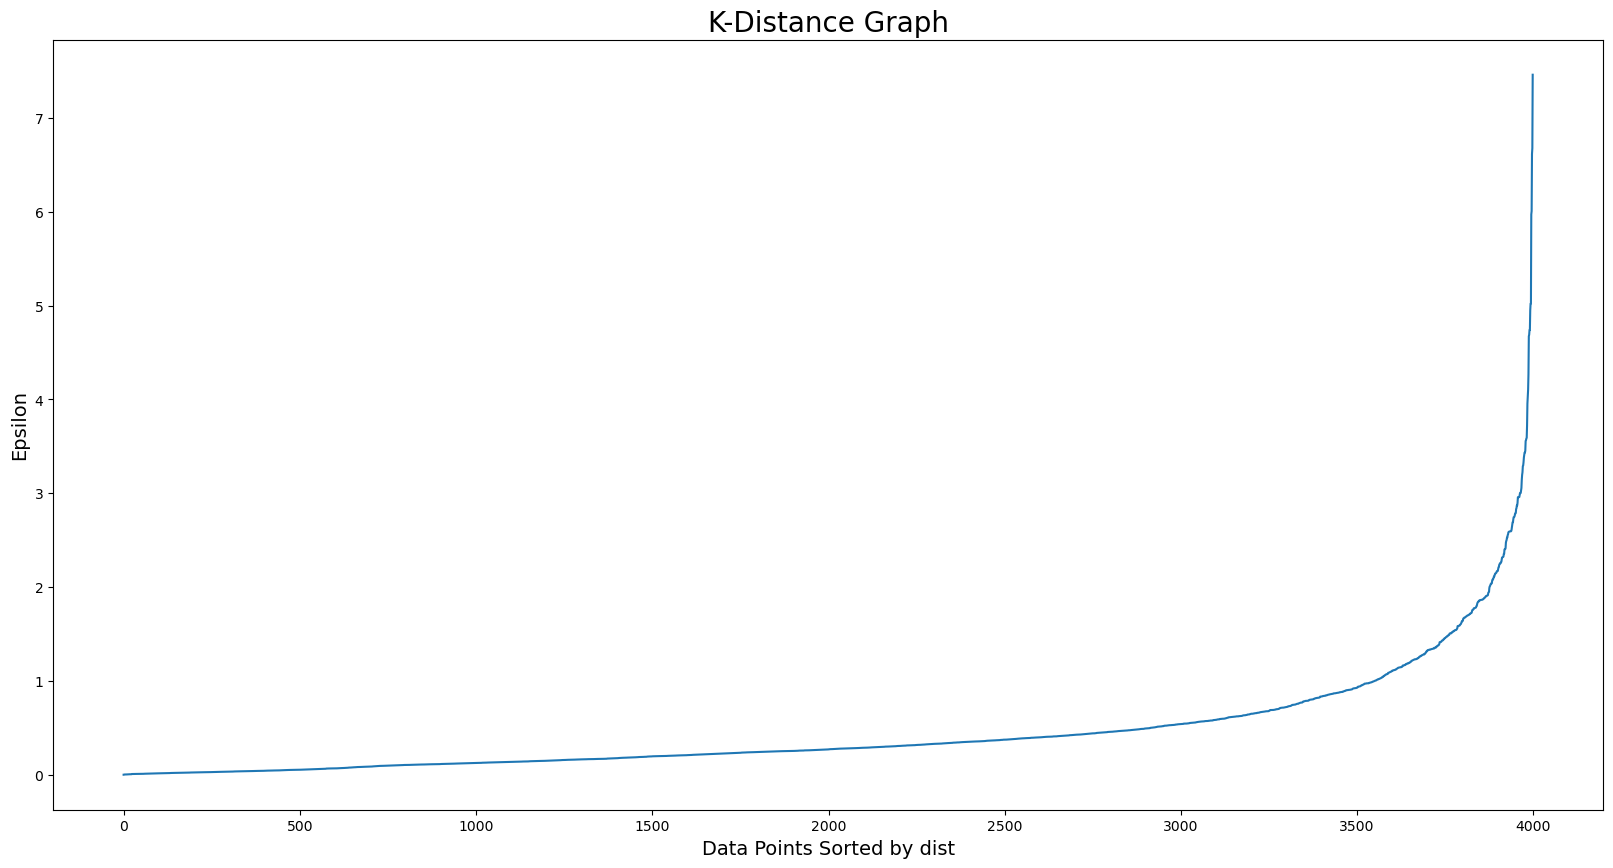

In [22]:
# Plotting K Distances Graph
distances = np.sort(distances, axis = 0)
distances = distances[:,1]
plt.figure(figsize=(20,10))
plt.plot(distances)
plt.title('K-Distance Graph',fontsize=20)
plt.xlabel('Data Points Sorted by dist',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

In [23]:
dbscan = DBSCAN(eps=2)
y_hc = dbscan.fit_predict(airline_scal)
y_hc

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [24]:
y = pd.DataFrame(y_hc)
y.value_counts()

 0    2453
 1    1330
-1     179
 2      16
 3       9
 4       7
 5       5
dtype: int64

In [25]:
airline['Cluster_DBSCAN']=dbscan.labels_
airline

,ID,Balance,Qualmiles,cc1,cc2,cc3,Bonusmiles,Bonustrans,Flightmiles,Flighttrans,Dayssinceenroll,Award,Cluster_hier,Cluster_DBSCAN
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,1,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,1,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,1,0


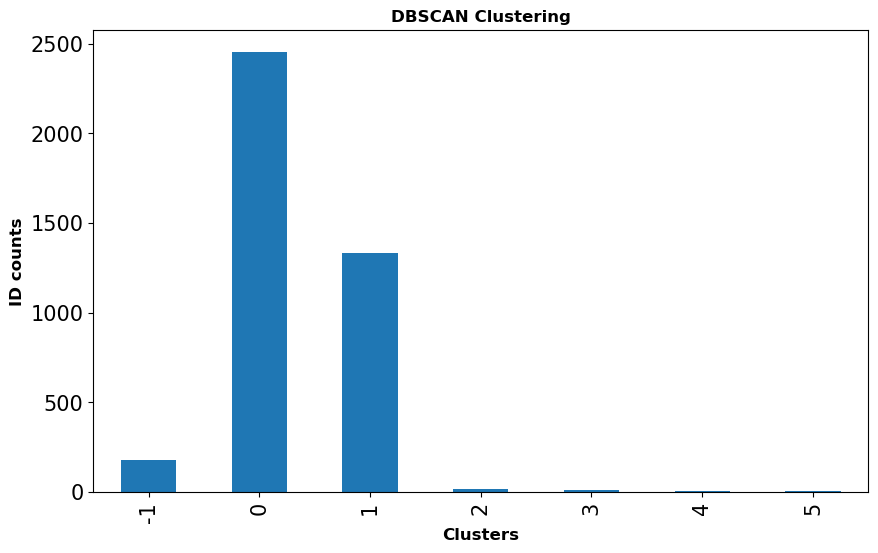

In [26]:
fig, ax = plt.subplots(figsize=(10, 6))
airline.groupby(['Cluster_DBSCAN']).count()['ID'].plot(kind='bar')
plt.ylabel('ID Counts')
plt.title('DBSCAN Clustering',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('ID counts', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

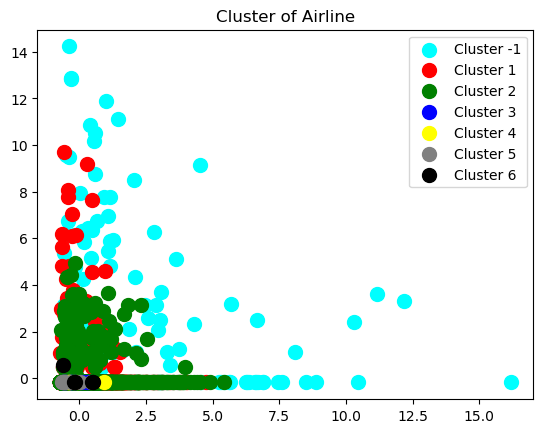

In [27]:
plt.scatter(airline_scal[y_hc == -1,0], airline_scal[y_hc == -1,1], s=100, c='cyan', label= 'Cluster -1')
plt.scatter(airline_scal[y_hc == 0,0], airline_scal[y_hc == 0,1], s=100, c='red', label= 'Cluster 1')
plt.scatter(airline_scal[y_hc == 1,0], airline_scal[y_hc == 1,1], s=100, c='green', label= 'Cluster 2')
plt.scatter(airline_scal[y_hc == 2,0], airline_scal[y_hc == 2,1], s=100, c='blue', label= 'Cluster 3')
plt.scatter(airline_scal[y_hc == 3,0], airline_scal[y_hc == 3,1], s=100, c='yellow', label= 'Cluster 4')
plt.scatter(airline_scal[y_hc == 4,0], airline_scal[y_hc == 4,1], s=100, c='Grey', label= 'Cluster 5')
plt.scatter(airline_scal[y_hc == 5,0], airline_scal[y_hc == 5,1], s=100, c='black', label= 'Cluster 6')
plt.title('Cluster of Airline')
plt.legend()
plt.show()

In [28]:
sil = silhouette_score(airline_scal , dbscan.labels_)
sil

0.25376617762145437

# KMeans Clustering

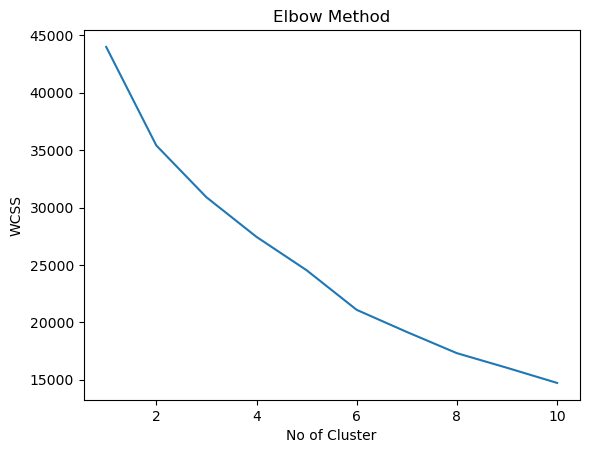

In [29]:
wcss = []
for i in range (1,11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(airline_scal)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.ylabel('WCSS')
plt.xlabel('No of Cluster')
plt.show()

In [30]:
kmeans = KMeans(n_clusters=6, random_state=0)
y_hc = kmeans.fit_predict(airline_scal)
y_hc

array([2, 2, 2, ..., 1, 2, 2])

In [31]:
y = pd.DataFrame(y_hc)
y = y.value_counts()
y

2    2494
1    1243
0     143
5      61
3      43
4      15
dtype: int64

In [32]:
airline['Cluster_Kmeans'] = kmeans.labels_
airline

,ID,Balance,Qualmiles,cc1,cc2,cc3,Bonusmiles,Bonustrans,Flightmiles,Flighttrans,Dayssinceenroll,Award,Cluster_hier,Cluster_DBSCAN,Cluster_Kmeans
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1,0,2
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1,0,2
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1,0,2
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1,0,2
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,1,1,2
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,1,1,2
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0,1,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,1,0,2


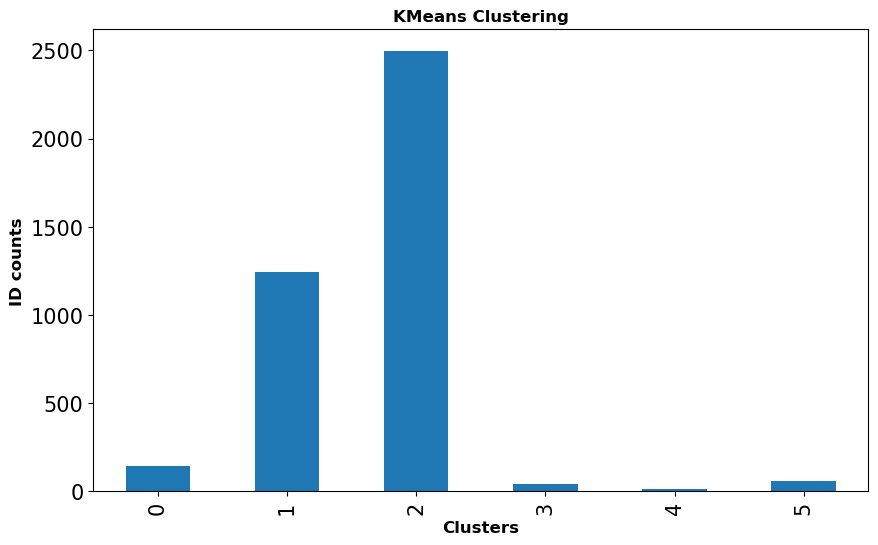

In [33]:
fig, ax = plt.subplots(figsize=(10, 6))
airline.groupby(['Cluster_Kmeans']).count()['ID'].plot(kind='bar')
plt.ylabel('ID Counts')
plt.title('KMeans Clustering',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('ID counts', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

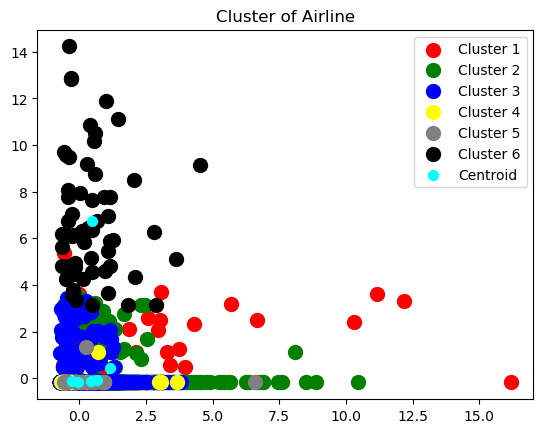

In [34]:
plt.scatter(airline_scal[y_hc == 0,0], airline_scal[y_hc == 0,1], s=100, c='red', label= 'Cluster 1')
plt.scatter(airline_scal[y_hc == 1,0], airline_scal[y_hc == 1,1], s=100, c='green', label= 'Cluster 2')
plt.scatter(airline_scal[y_hc == 2,0], airline_scal[y_hc == 2,1], s=100, c='blue', label= 'Cluster 3')
plt.scatter(airline_scal[y_hc == 3,0], airline_scal[y_hc == 3,1], s=100, c='yellow', label= 'Cluster 4')
plt.scatter(airline_scal[y_hc == 4,0], airline_scal[y_hc == 4,1], s=100, c='Grey', label= 'Cluster 5')
plt.scatter(airline_scal[y_hc == 5,0], airline_scal[y_hc == 5,1], s=100, c='black', label= 'Cluster 6')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=50, c= 'cyan', label= 'Centroid')
plt.title('Cluster of Airline')
plt.legend()
plt.show()

In [35]:
sil = silhouette_score(airline_scal , kmeans.labels_)
sil

0.3338735662323181